In [2]:
import string
import csv
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# CSV data
df5 = pd.read_excel('C:/Users/VP/Desktop/covid_list_5.xlsx')

In [4]:
df5

,Case ID,Provincial Case ID,Age,Gender,City,Province,Country,Date Reported,report_week,Travelled (Y/N)
0,1,1,50-59,1,Toronto,Ontario,Canada,25-01-2020,19-01-2020,1
1,2,2,50-59,0,Toronto,Ontario,Canada,27-01-2020,26-01-2020,1
2,3,1,40-49,1,Vancouver Coastal,BC,Canada,28-01-2020,26-01-2020,1
3,4,3,20-29,0,Middlesex-London,Ontario,Canada,31-01-2020,26-01-2020,1
4,5,2,50-59,0,Vancouver Coastal,BC,Canada,04-02-2020,02-02-2020,0
...,...,...,...,...,...,...,...,...,...,...
3399,3405,655,Not Reported,2,Interior,BC,Canada,25-03-2020,22-03-2020,2
3400,3406,656,Not Reported,2,Interior,BC,Canada,25-03-2020,22-03-2020,2
3401,3407,657,Not Reported,2,Interior,BC,Canada,25-03-2020,22-03-2020,2
3402,3408,658,Not Reported,2,Interior,BC,Canada,25-03-2020,22-03-2020,2


In [5]:
#Website data
df6 = pd.read_excel('C:/Users/VP/Desktop/covid_list_6.xlsx')

In [6]:
df6

,Age,Cases,Cases/million inhabitants,Resolved,Male,Female,Transgender other,Deaths,Male deaths,Female deaths
0,19 and under,743,237.0,565,371,366,1,0,0,0
1,20-29,2997,1441.0,2452,1365,1628,0,2,1,1
2,30-39,3102,1571.0,2604,1422,1667,2,6,6,0
3,40-49,3396,1836.0,2928,1455,1927,3,17,12,5
4,50-59,4100,1990.0,3448,1726,2363,2,64,41,23
5,60-69,3004,1767.0,2390,1479,1510,1,164,104,60
6,70-79,2139,1962.0,1428,1074,1043,1,355,222,129
7,80-89,3000,5882.0,1775,1090,1858,0,744,341,391
8,90 and over,2132,16400.0,1168,518,1565,0,669,207,452
9,Unknown,15,NaN,9,6,8,0,0,0,0


In [7]:
#API data
df7 = pd.read_excel('C:/Users/VP/Desktop/covid_list_7.xlsx')

In [8]:
df7

,Row_ID,Test Reported Date,Age,Gender,Information on Acquisition,Outcome,Case Reporting Destination,Case Reporting City,Case Reporting Latitude,Case Reporting Longitude
0,1,2020-07-17T00:00:00,20s,FEMALE,No Epi-link,Not Resolved,Peel Public Health,Mississauga,43.647471,-79.708893
1,3,2020-07-18T00:00:00,50s,FEMALE,No Epi-link,Not Resolved,Peel Public Health,Mississauga,43.647471,-79.708893
2,4,2020-07-16T00:00:00,<20,MALE,No Epi-link,Not Resolved,Peel Public Health,Mississauga,43.647471,-79.708893
3,5,2020-07-20T00:00:00,30s,FEMALE,No Epi-link,Not Resolved,Peel Public Health,Mississauga,43.647471,-79.708893
4,6,2020-07-17T00:00:00,50s,MALE,No Epi-link,Not Resolved,Peel Public Health,Mississauga,43.647471,-79.708893
...,...,...,...,...,...,...,...,...,...,...
37500,37938,2020-05-25T00:00:00,70s,MALE,No Epi-link,Resolved,Toronto Public Health,Toronto,43.656591,-79.379358
37501,37939,2020-05-28T00:00:00,20s,FEMALE,OB,Resolved,Toronto Public Health,Toronto,43.656591,-79.379358
37502,37940,2020-05-25T00:00:00,40s,FEMALE,OB,Resolved,Toronto Public Health,Toronto,43.656591,-79.379358
37503,37941,2020-05-27T00:00:00,70s,FEMALE,CC,Resolved,Toronto Public Health,Toronto,43.656591,-79.379358


In [9]:
#Putting all data into one variable for merging all the datasets
dfs = [df5, df6, df7]
print(dfs)

[      Case ID  Provincial Case ID           Age  Gender               City  \
0           1                   1         50-59       1            Toronto   
1           2                   2         50-59       0            Toronto   
2           3                   1         40-49       1  Vancouver Coastal   
3           4                   3         20-29       0   Middlesex-London   
4           5                   2         50-59       0  Vancouver Coastal   
...       ...                 ...           ...     ...                ...   
3399     3405                 655  Not Reported       2           Interior   
3400     3406                 656  Not Reported       2           Interior   
3401     3407                 657  Not Reported       2           Interior   
3402     3408                 658  Not Reported       2           Interior   
3403     3409                 659  Not Reported       2           Northern   

     Province Country Date Reported report_week  Travelled (Y/

In [10]:
#Merging all the 3 datasets.
from functools import partial, reduce
merge = partial(pd.merge, on=['Age'], how='outer')
dfs1 = reduce(merge, dfs)

In [11]:
dfs1

,Case ID,Provincial Case ID,Age,Gender_x,City,Province,Country,Date Reported,report_week,Travelled (Y/N),...,Female deaths,Row_ID,Test Reported Date,Gender_y,Information on Acquisition,Outcome,Case Reporting Destination,Case Reporting City,Case Reporting Latitude,Case Reporting Longitude
0,1.0,1.0,50-59,1.0,Toronto,Ontario,Canada,25-01-2020,19-01-2020,1.0,...,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,2.0,50-59,0.0,Toronto,Ontario,Canada,27-01-2020,26-01-2020,1.0,...,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5.0,2.0,50-59,0.0,Vancouver Coastal,BC,Canada,04-02-2020,02-02-2020,0.0,...,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,15.0,7.0,50-59,1.0,Toronto,Ontario,Canada,28-02-2020,23-02-2020,1.0,...,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,18.0,10.0,50-59,0.0,Durham,Ontario,Canada,29-02-2020,23-02-2020,1.0,...,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44886,NaN,NaN,UNKNOWN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,24126.0,2020-07-03T00:00:00,MALE,OB,Resolved,Windsor-Essex County Health Unit,Windsor,42.308796,-83.033670
44887,NaN,NaN,UNKNOWN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,26330.0,2020-07-17T00:00:00,MALE,CC,Not Resolved,Niagara Region Public Health Department,Thorold,43.116537,-79.241220
44888,NaN,NaN,UNKNOWN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,26448.0,2020-04-17T00:00:00,MALE,No Epi-link,Resolved,Toronto Public Health,Toronto,43.656591,-79.379358
44889,NaN,NaN,UNKNOWN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,29600.0,2020-05-15T00:00:00,MALE,OB,Resolved,Toronto Public Health,Toronto,43.656591,-79.379358


In [49]:
#This is the code for an excel file of the merged data.
dfs1.to_excel("covid_li.xlsx", index=False)

In [85]:
#Connecting to SQL Lite
import csv, sqlite3
from sqlalchemy import create_engine

In [86]:
file = 'covid_li.xlsx'

In [87]:
#Creating a database
conn = create_engine('sqlite:///covid-3.db', echo=False)

In [88]:
#checking to see if the connection is opened or not
def is_opened(conn):
    try:
        conn.execute("")
        return True
    except sqlite3.ProgrammingError as e:
        print("Connection closed {}".format(e))
        return False

In [89]:
print(is_opened(conn))

True


In [90]:
#Loading the merged data into the database and checking if it works.
df8 = pd.read_excel(file, sheet_name='Sheet1')
df8.to_sql('covid3', conn, if_exists='replace', index=False)

results = conn.execute("Select * from covid3")


In [91]:
#Closing the connection
results.close()

C:\Users\VP\Anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


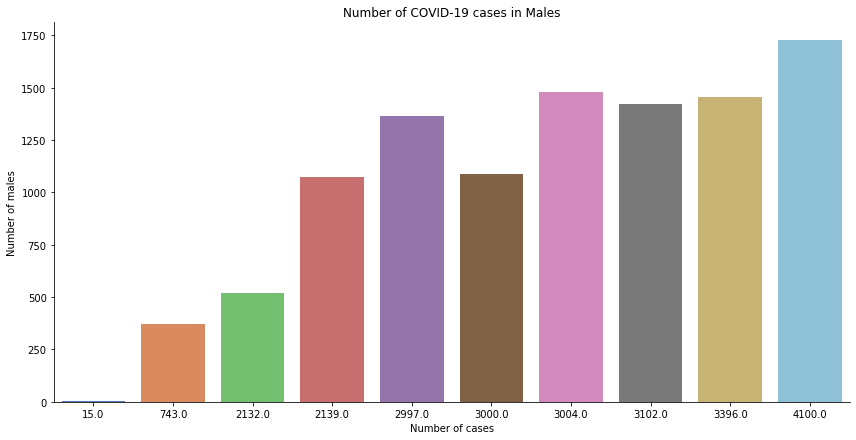

In [92]:
#Graph # 1
#Based on the graph, it appears the highest number of COVID-19 cases is 4100 that affect approximately 1750 males.

ax = sns.factorplot("Cases", "Male", data=dfs1, kind="bar", height=6, aspect=2, palette="muted", legend=False)
ax.set(xlabel='Number of cases', ylabel='Number of males')
plt.title("Number of COVID-19 cases in Males")
plt.show()

C:\Users\VP\Anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


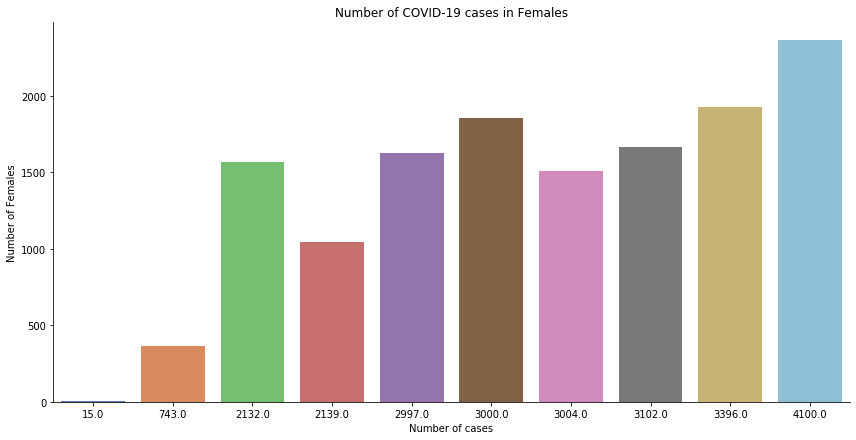

In [93]:
#Graph # 2
#However, based on this graph, it appears the highest number of COVID-19 cases is also 4100 
#but this time it affect approximately more than 2000 females. Based on the 2 graphs, this indicates there were more
#COVID-19 cases in females compared to males.

ax1 = sns.factorplot("Cases", "Female", data=dfs1, kind="bar", height=6, aspect=2, palette="muted", legend=False)
ax1.set(xlabel='Number of cases', ylabel='Number of Females')
plt.title("Number of COVID-19 cases in Females")
plt.show()

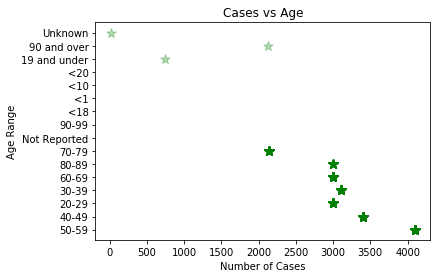

In [21]:
#Graph # 3
#Based on the graph, it appears that the 50-59 year olds had the most COVID-19 cases, i.e. a little over 4000 cases.

plt.scatter(dfs1.Cases, dfs1.Age, alpha=0.3, color='g', marker="*", s=100)

plt.xlabel('Number of Cases')
plt.ylabel('Age Range')
plt.title('Cases vs Age')
plt.show()

C:\Users\VP\Anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


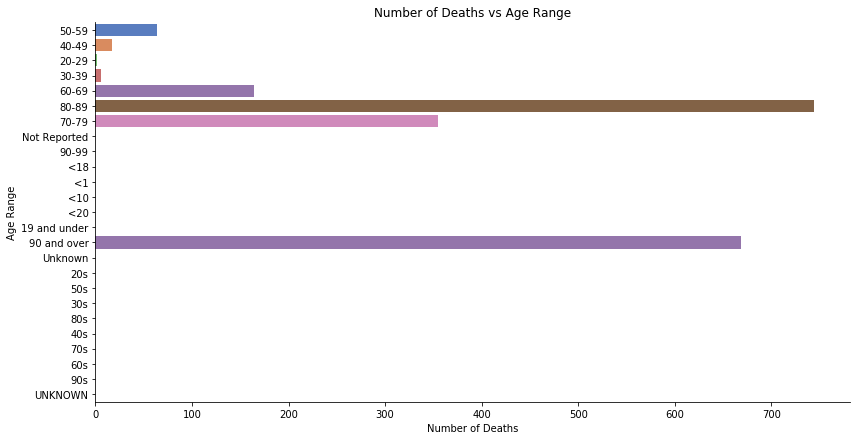

In [22]:
#Graph # 4
#Based on the graph, it appears that the most deaths (i.e. over 700 deaths) happened to people who are between the age range 
#of 80-89 years old.

ax2 = sns.factorplot("Deaths", "Age", data=dfs1, kind="bar", height=6, aspect=2, palette="muted", legend=False)
ax2.set(xlabel='Number of Deaths', ylabel='Age Range')
plt.title("Number of Deaths vs Age Range")
plt.show()

C:\Users\VP\Anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


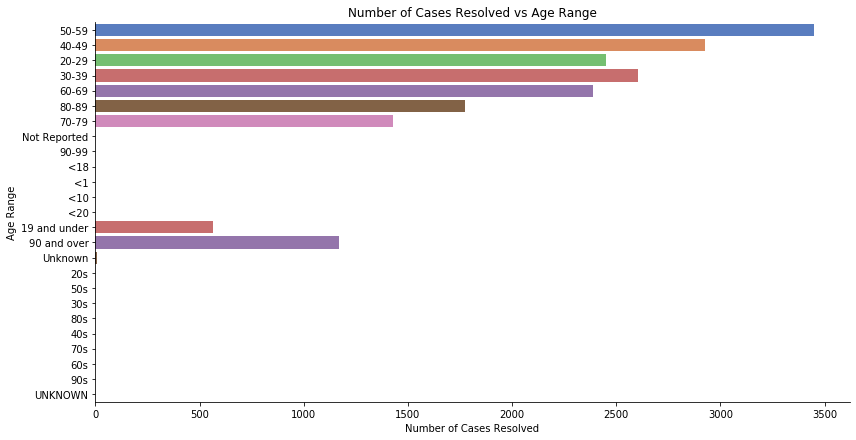

In [23]:
#Graph # 5
#Based on the graph, it appears that the most resolved cases (i.e. over 3000 resolved cases) happened to people between 
#the age range of 50-59.

ax3 = sns.factorplot("Resolved", "Age", data=dfs1, kind="bar", height=6, aspect=2, palette="muted", legend=False)
ax3.set(xlabel='Number of Cases Resolved', ylabel='Age Range')
plt.title("Number of Cases Resolved vs Age Range")
plt.show()

C:\Users\VP\Anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


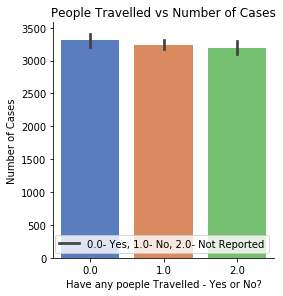

In [24]:
#Graph # 6
#Based on the graph, it appears that people who chose to chose to travel either out of country or in country got COVID-19 
#and had the the most cases (i.e.more than 3000 cases). Whereas, people who did not travel also got COVID-19, but there were  
#little less number of cases than compared to people who chose to travel.

ax4 = sns.factorplot("Travelled (Y/N)", "Cases", data=dfs1, kind="bar", height=4, aspect=1, palette="muted", legend_out=False)
ax4.set(xlabel='Have any poeple Travelled - Yes or No?', ylabel='Number of Cases')
plt.title("People Travelled vs Number of Cases")
plt.legend(['0.0- Yes, 1.0- No, 2.0- Not Reported'], loc="lower right")
plt.show()